### Nonlinear classifiers

- nearest neighbors classifiers
- kernel SVM
- trees, random forest
- ...

#### KNN

basic idea of k Nearest Neighbors (kNN) classifier: knn classifies objects based on their closest training examples in the feature space. 
- mathematical formulation:
  - define $N_k(x)$ as the set of $k$ closest training examples to any $x$ in the feature space
  - $\hat{y}_k(x)=\frac{1}{k}\sum_{x_i \in N_k(x)}y_i=Ave\{y_i|x_i \in N_k(x)\}$
  - $\hat{f}_k(x)=\begin{cases}1 \quad if \quad \hat{y}_k(x)>.5 \\ 0 \quad o.w. \end{cases}$
- majority vote
  - knn assigns a point with the label that is the most common amongst its k nearest neighbors
    - any future prediction for input x is made by a majority vote in $N_k(x)$
  - drawback: if the data set is unbalanced, the classifier will be biased towards the majority/larger class as larger-class examples show up mroe drequently in $N_k(x)$
  - solution: weighting the votes of the neighbors by their distance to the test point
    - $\hat{y}_k(x)=\frac{1}{k}\sum_{x_i \in N_k(x)}w(x_i,x)y_i$
    - $w(x_i,x)=\frac{1}{\sum_{x_j \in N_k(x)}d(x_i,x_j)}$
    - $d(x_i,x_j)$ is the distance between $x_i$ and $x_j$
- distance measure
  - Euclidean distance is a common choice for $d(x_i,x_j)$
  - other distance measures: Manhattan distance, Minkowski distance, Hamming distance for text/character input.
  - prediction is dependent on the distance measure
  - the classification accuracy can be improved significantly by choosing an appropriate distance measure learning with specilized algorithm such as Large Margin Nearest Neighbors (**LMNN**)
- k
  - k is a hyperparameter that controls the model complexity
  - small k: overfitting, low bias and high variance
  - large k: underfitting, high bias and low variance
  - cross-validation is a common way to tune k


- Euclidean distance for general setup

$$
\sqrt{\sum_{i=1}^n(q_i-p_i)^2}

$$

(120, 4)
(120,)


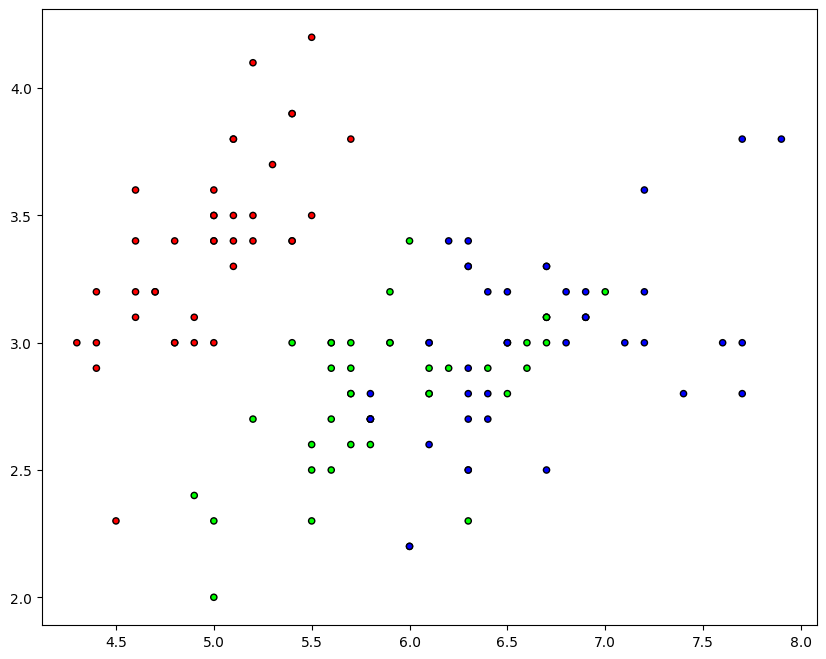

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)
print(X_train.shape)
print(y_train.shape)

# plot
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], 
            c=y_train, 
            cmap=cmap, edgecolor='k', s=20)
plt.show()


In [17]:
from knn import knn
model = knn(k=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accu = np.mean(y_pred == y_test)
print(accu)

0.9
